# Homework 5: 

**DUE:** 5pm EST, March 17, 2020

<br>

### **Conceptual:** Short answer questions. Be concise

---

1. Suppose that we have a dataset with five predictors, $X_1 = GPA$, $X_2 = IQ$, $X_3 = Gender$ (1 for Female and 0 for Male), $X_4$ = Interaction between GPA and IQ, and $X_5$ = Interaction between GPA and Gender. The response variable ($Y$) is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get $\hat{\beta_0}$ =50, $\hat{\beta_1}$ =20, $\hat{\beta_2}$ =0.07, $\hat{\beta_3}$ =35, $\hat{\beta_4}$ =0.01, $\hat{\beta_5}$ =-10.

<br>
    
_(a) Which answer is correct, and why?_

i. For a fixed value of IQ and GPA, males earn more on average than females.

ii. For a fixed value of IQ and GPA, females earn more on average than males.

iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.

iv. For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough.

**Answer:**

iii is correct. 

Assuming that the fixed GPA is $G$, the fixed IQ is $I$, the estimate for female is: 

$$
\begin{align*}
\hat{Y_f} &= 50 + 20 * G +0.07 * I + 35 * 1 + 0.01 * (G * I) - 10 * (G * 1) + e\\
\hat{Y_f} &= 50 + 20G + 0.07I + 35 + 0.01GI - 10G + e
\end{align*}
$$

And the estimate for male is: 
$$
\begin{align*}
\hat{Y_m} &= 50 + 20 * G +0.07 * I + 35 * 0 + 0.01 * (G * I) - 10 * (G * 0) + e\\
\hat{Y_m} &= 50 + 20G + 0.07I + 0.01GI + e
\end{align*}
$$

The difference between $\hat{Y_f}$ and $\hat{Y_x}$ is: 

$$
\begin{align*}
\hat{Y_f} - \hat{Y_m} &= 50 + 20G + 0.07I + 35 + 0.01GI - 10G + e - 50 - 20G - 0.07I - 0.01GI - e \\
\hat{Y_f} - \hat{Y_m} &= 35 - 10G 
\end{align*}
$$

When the difference is positive, it suggests that the estimate for female graduate is higher than the male graduate student. However, when GPA is high enough: 

$$
\begin{align*}
35 - 10G &< 0 \\
35 &< 10G \\
G &> 3.5 \\
\end{align*}
$$

When GPA is higher than 3.5, for a fixed value of IQ and GPA, males earn more on average than females

<br>

_(b) Predict the salary of a female graduate with IQ of 110 and a GPA of 4.0._

**Answer:**

$$
\begin{align*}
\hat{Y_f} &= 50 + 20 * 4 +0.07 * 110 + 35 * 1 + 0.01 * (4 * 110) - 10 * (4 * 1) + e\\
\hat{Y_f} &= 137.1 + e
\end{align*}
$$

The salary of a female graduate with IQ of 110 and a GPA of 4.0 is about 137.1K per year. 

<br>

_(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer._



**Answer:**

False. Evidence of interaction effect shouldn't be only based on the numerical value of the coefficient. Dropping the interaction term will lead to the underestimation of the income. 

---

2. What are high leverage observations? How do they impact your model fits? What assumption of linear regression do they violate?

**Answer:**

High leverage observations are data points that locate at extremely high end of the X-axis. It will pull the model right toward that direction. High leverage points violated the normality assumption. 

---

3. A linear mixed effect model has the form $Y = X\beta + Z\upsilon + \epsilon$. 

<br>

_(a) What are the assumptions about $Z$ and $\upsilon$ that make this different from using a regular control variable in a simple linear regression model?_

**Answer:** 

The assumption about $Z$ and $\upsilon$ is that there are random. $Z$ indicates a set of categorical variables that do not have a meaningful orders between each others. $\upsilon$ indicates the influence that each level of $Z$ actually has on Y. The effects that $Z$ and $\upsilon$ have are real but they are randomly determined.    

In contrast, regular control variables are not random. They are included as a way to control for the potentially confounding factors. When the control variables correlate with the real factor and the response, including the control variables will give you the partial effect that real factors yield given the controlled variables. The model is still a fixed-effect model.



<br>

_(b) What is the objective function for this model (i.e., the function that needs to be minimized to find the optimal parameters) and how is it different than the objective function for the ordinary least squares model?_

**Answer:**

The objective function for this model: 
$$min(||Y-X\beta-Z\Lambda_{\theta}\upsilon||^2+||\upsilon||^2)$$

Since $Z$ is the random factor and could have its own structure, the variance of the random effect is different from the fixed effect. Therefore we need include the independent variance matrix $\Lambda_{\theta}$ in the objective function. We also want to minimize the effect of random factor, therefore we inculde $||\upsilon|| ^2$ too. 

<br>

_(c) What advantage does including a random effects term in your model give you with regards to understanding the fixed effects relationship?_

**Answer:**

The fixed effects relationship we see after including a random effects term has more generalizability. 

<br>

_(d) Which of these variables would be considered random factors?_

* Age
* Subject ID
* Classroom number
* Gender
* Reaction Time
* JPEG image filename
* Time of day

**Answer:**

* Subject ID 
* Classroom number 
* JPEG image filename 


---

### **Applied:** Show your code & plots

We will use both datasets from the CRAN universe and the HCP dataset for these problems. Include conceptual answers to questions as comments in code cells.

---

4. Load the cbpp dataset from the lme4 library. Run ?cbpp after loading the lme4 library to get information on the dataset.

(a) Plot the relationship between herd size and CBPP incidence


In [17]:
library(tidyverse)
library(lme4)
?cbpp

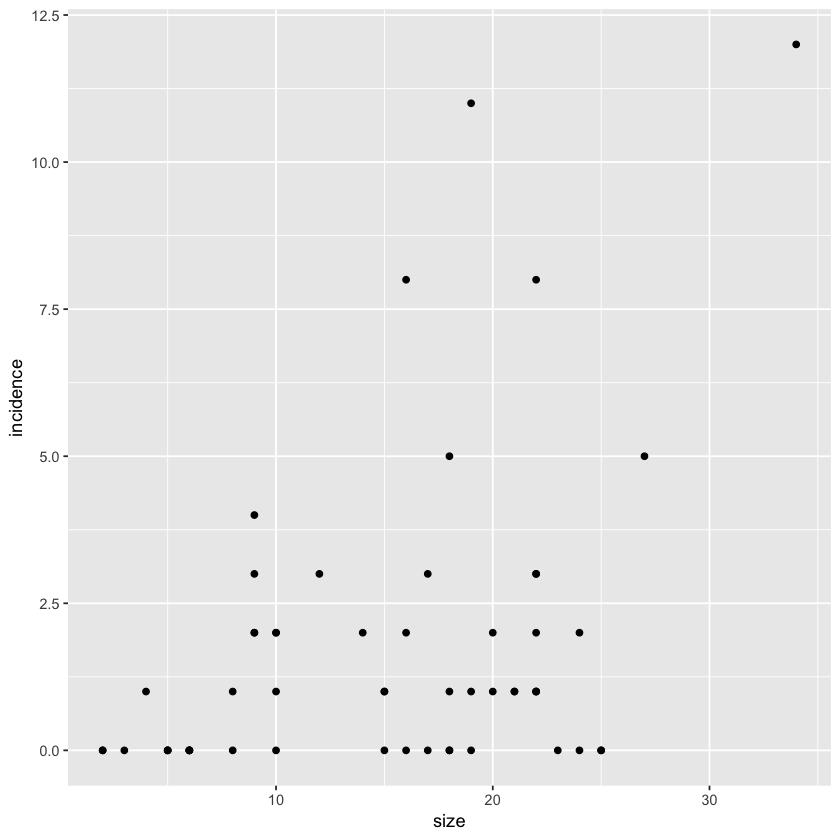

In [13]:
ggplot(cbpp, mapping = aes(x = size, y = incidence)) + 
geom_point()


(b) Use the lm function to model the effect of herd size (predictor) on CBPP incidence (response). How does herd size impact disease rate? Report the results of the model.



_Results_

The heard size has a positive impact on the disease rate. For every one unit increase in heard size at the beginning of a given time period, there is a 0.14 increase of the number of new serological cases for that herd and during that time period. 

In [14]:
# (b)
lm.fit <- lm(incidence ~ size, data = cbpp)
summary(lm.fit)


Call:
lm(formula = incidence ~ size, data = cbpp)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1456 -1.5925 -0.4864  0.8006  8.6840 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.31106    0.73554  -0.423  0.67405   
size         0.13827    0.04389   3.150  0.00266 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.432 on 54 degrees of freedom
Multiple R-squared:  0.1553,	Adjusted R-squared:  0.1396 
F-statistic: 9.926 on 1 and 54 DF,  p-value: 0.002657



(c) Use the lmer function to include the herd identifier as a random effect. How does this impact the fixed effect of herd size on CBPP incidence?


The coefficient of the fixed effect of size becomes larger and the t-value increases. The model becomes less conservative. 

In [24]:
# (c)

lmer.identifier <- lmer(incidence ~ size + (1 | herd), data = cbpp)
summary(lmer.identifier)

Linear mixed model fit by REML ['lmerMod']
Formula: incidence ~ size + (1 | herd)
   Data: cbpp

REML criterion at convergence: 257.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7326 -0.4817 -0.1526  0.3818  3.0017 

Random effects:
 Groups   Name        Variance Std.Dev.
 herd     (Intercept) 2.833    1.683   
 Residual             4.058    2.015   
Number of obs: 56, groups:  herd, 15

Fixed effects:
            Estimate Std. Error t value
(Intercept) -1.69665    0.96525  -1.758
size         0.23748    0.05264   4.511

Correlation of Fixed Effects:
     (Intr)
size -0.845


(d) Compare the simple linear model (i.e., the fixed effects only model) with the mixed effect model using AIC (https://en.wikipedia.org/wiki/Akaike_information_criterion). Does adding the random effect to the model improve or change the fixed effect?


No it does not improve the fixed effect. When taking into account the complexity that brought by adding the random effect, the mixed effect model has higher AIC. 

In [25]:
# (d)

ic = AIC(lm.fit, lmer.identifier)
ic


,df,AIC
lm.fit,3,262.4036
lmer.identifier,4,265.8909


---

5. Load the HCP dataset.

_(a) Make a new data frame that includes the fields for subject ID (Subject), gender (Gender), age (Age), intracranial volume (FS_IntraCranial_Vol), and total gray matter volume (FS_Total_GM_Vol). Load the variables in that order. Remove the _na_'s and z-score the values for intracranial volume and total gray matter volume._

In [41]:
# -------------------------------
# Question 5
# -------------------------------
hcp_df <- read.csv("/Users/caoanjie/Desktop/Spring2020/DS/_DSPN_S20/hw5/unrestricted_trimmed_1_7_2020_10_50_44.csv")

hcp_df  %>% 
select(Subject, Gender, Age, FS_IntraCranial_Vol, FS_Total_GM_Vol)  %>% 
na.omit()  -> hcf_df_clean 

z_IntraCranial_Vol <- scale(hcf_df_clean$FS_IntraCranial_Vol)
z_GM_Vol <- scale(hcf_df_clean$FS_Total_GM_Vol)

hcf_df_clean$FS_IntraCranial_Vol <- z_IntraCranial_Vol
hcf_df_clean$FS_Total_GM_Vol <- z_GM_Vol

hcf_df_clean


,Subject,Gender,Age,FS_IntraCranial_Vol,FS_Total_GM_Vol
2,100206,M,26-30,1.500444521,1.80889969
3,100307,F,26-30,-0.349673920,-0.32609287
4,100408,M,31-35,0.552192292,0.60000887
5,100610,M,26-30,1.245646766,1.13855669
6,101006,F,31-35,-0.742178208,-1.58649345
7,101107,M,22-25,-0.348691425,-0.31266722
9,101309,M,26-30,-0.203060684,0.32355970
10,101410,M,26-30,1.287615451,1.30509449
12,101915,F,31-35,-0.494248434,-0.14472718
13,102008,M,22-25,0.505084469,0.46588657


<br>

(b) Take this new dataframe and fit a simple logistic regression model to classify gender based on the intracranial volume measure and examine the model fit using the summary function_


In [43]:
# (b)

glm.fit <- glm(Gender ~ FS_IntraCranial_Vol, data=hcf_df_clean, family=binomial)
summary(glm.fit)


Call:
glm(formula = Gender ~ FS_IntraCranial_Vol, family = binomial, 
    data = hcf_df_clean)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5646  -0.6769  -0.1836   0.6434   3.5450  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.36336    0.08133  -4.467 7.91e-06 ***
FS_IntraCranial_Vol  2.22771    0.13192  16.886  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  968.67  on 1111  degrees of freedom
AIC: 972.67

Number of Fisher Scoring iterations: 5


<br>

(c) Calculate the confusion matrix for evaluating how well the model can classify the dataset and find the classification accuracy for the logistic regression model. Report the classification accuracy.

**Note:** Be careful to take note how R automatically codes Gender and make sure your labels are matched accordingly.


The classification accuracy is about 80.86%

In [56]:
# (c)

contrasts(hcf_df_clean$Gender)
threshold = 0.50

glm_prob_df = data.frame(predict(glm.fit, type = "response"))
colnames(glm_prob_df) = c('predicted_prob')

glm_prob_df$predicted_binary=rep("F")
glm_prob_df$predicted_binary[glm_prob_df$predicted_prob>threshold]="M"

confusion_df = data.frame(glm_prob_df$predicted_binary, hcf_df_clean$Gender)
colnames(confusion_df) = c('predicted', 'actual')

table(confusion_df)

mean(confusion_df$predicted == confusion_df$actual)


,M
F,0
M,1


         actual
predicted   F   M
        F 506 113
        M 100 394

[1] 0.8086253

<br>

(d) Using the _boot_ library, calculate the leave one out cross-validation (LOOCV) for the same model you fit in (b).

In [57]:
# (d)
library(boot)


In [59]:
library(boot)
cv.err  = cv.glm(hcf_df_clean, glm.fit, K=nrow(hcf_df_clean)) 
cv.err$delta

[1] 0.1367901 0.1367898

<br>

(e) Now test the k-fold cross validation accuracy using K=10. Is this better, worse, or the same than the LOCCV accuracy?

About the same. 

In [60]:
# (e)
cv.err  = cv.glm(hcf_df_clean, glm.fit, K=10) 
cv.err$delta

[1] 0.1371558 0.1371028

(f) Finally, fit a LDA model with the same variables and plot the model fit. Make sure you load the MASS library to use the lda function. What's the classification accuracy of the LDA model?

The classification accuracy is about 80.6%

In [ ]:

glm_prob_df$predicted_binary=rep("F")
glm_prob_df$predicted_binary[glm_prob_df$predicted_prob>threshold]="M"

confusion_df = data.frame(glm_prob_df$predicted_binary, hcf_df_clean$Gender)
colnames(confusion_df) = c('predicted', 'actual')

Call:
lda(Gender ~ FS_IntraCranial_Vol, data = hcf_df_clean)

Prior probabilities of groups:
        F         M 
0.5444744 0.4555256 

Group means:
  FS_IntraCranial_Vol
F          -0.5673165
M           0.6780943

Coefficients of linear discriminants:
                         LD1
FS_IntraCranial_Vol 1.274621

             data_original
lda_predicted   F   M
            F 501 111
            M 105 396

[1] 0.8059299

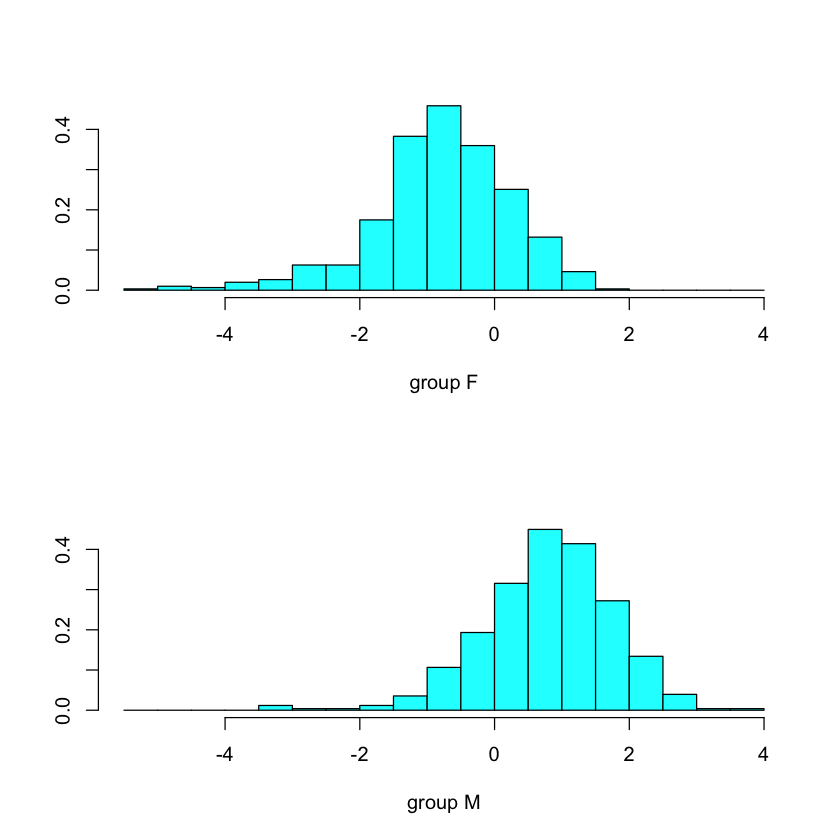

In [73]:
# (f)
library(MASS)
lda.fit = lda(Gender~FS_IntraCranial_Vol, data=hcf_df_clean)
lda.fit 
plot(lda.fit)

lda.pred = predict(lda.fit, hcf_df_clean)

# We next extract the output of the prediction 
lda_df = data.frame(predict(lda.fit, hcf_df_clean))
colnames(lda_df) = c('predicted_prob')
lda_predicted = lda_df$predicted_prob
data_original = hcf_df_clean$Gender

table(lda_predicted, data_original)
mean(lda_predicted==data_original)
